# UPA - projekt 01: Školství v ČR - 2. časť
## Vizualizácia dát

### Importovanie potrebných knižníc

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs("output/svg", exist_ok=True)

# Dotazy skupiny A - 1

- 4 krabicové grafy, které zobrazí rozložení mateřských škol podle jejich kapacity v Brně / Praze / Jihomoravském / Středočeském kraji.
- [ms_distribution.csv](./output/csv/ms_distribution.csv)

<Figure size 800x800 with 0 Axes>

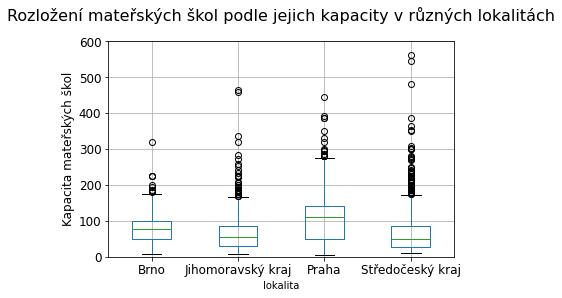

In [3]:
# load stored data from csv file to python pandas dataframe
df = pd.read_csv ('./output/csv/ms_distribution.csv')

fig = plt.figure(figsize=(10, 10), dpi=80)
fig.set_size_inches(10, 10)

boxplot = df.boxplot(by='lokalita', column='kapacita', fontsize=12)

plt.title('Rozložení mateřských škol podle jejich kapacity v různých lokalitách', fontsize=16, pad=20)
plt.suptitle('') # that's what you're after

plt.ylim(0, max(df['kapacita'])+40)
plt.ylabel("Kapacita mateřských škol", fontsize=12)

plt.savefig("output/svg/box_plot.svg", format="svg", bbox_inches='tight')

# Dotazy skupiny A - 2
- histogram znázorňující distribuci počtu základních škol podle jejich kapacity v celé ČR a ve zvoleném kraji.
- [Počty základních škol podle jejich kapacity v celé ČR](./output/csv/zs_all_rep.csv)
- [Počty základních škol podle jejich kapacity v Olomouckém kraji](./output/csv/zs_olomouc_region.csv)

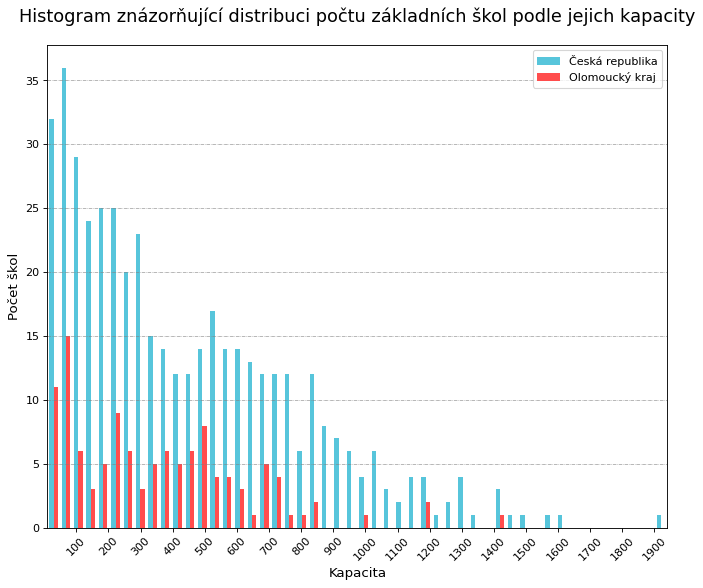

In [4]:
# load stored data from csv file to python pandas dataframe
df_CR = pd.read_csv ('./output/csv/zs_all_rep.csv')
df_kraj = pd.read_csv ('./output/csv/zs_olomouc_region.csv')

fig = plt.figure(figsize=(10, 6), dpi=80)
fig.set_size_inches(10, 8)

ax = plt.subplot(111)

plt.title('Histogram znázorňující distribuci počtu základních škol podle jejich kapacity', fontsize=16, pad=20)

ax = plt.hist([df_CR["kapacita"], df_kraj["kapacita"]], color=['#57c5db','#ff4d4d'], histtype ='bar', label=['Česká republika', 'Olomoucký kraj'], bins=50, rwidth=0.7)
plt.legend(prop={'size': 10})

plt.xlim(min(df_CR['kapacita']), max(df_CR['kapacita']))
plt.xticks(rotation = 45)
plt.locator_params(axis="x", nbins=20)
plt.locator_params(axis="y", nbins=15)

plt.ylabel("Počet škol", fontsize=12)
plt.xlabel("Kapacita", fontsize=12)
plt.grid(axis = 'y', color = 'grey', linestyle = '-.', linewidth = 0.5)

plt.savefig("output/svg/hist.svg", format="svg", bbox_inches='tight')

# Dotaz skupiny B
- Žebříček krajů dle kapacity škol na počet obyvatel, výsledky zobrazte graficky. Graf bude pro každý kraj zobrazovat kapacitu všech škol, celkový počet obyvatel a kapacitu škol na jednoho obyvatele. Graf můžete zhotovit kombinací dvou grafů do jednoho (jeden sloupcový graf zobrazí první dvě hodnoty a druhý, čárový graf, hodnotu třetí).

- [Kraje České republiky, jejich celková populace a kapacita škol](./output/csv/population_capacity_regions.csv)

No handles with labels found to put in legend.


<Figure size 1600x1600 with 0 Axes>

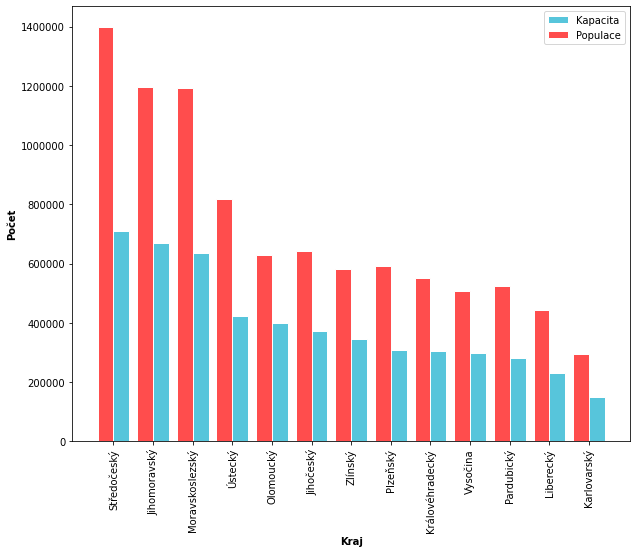

<Figure size 1600x1600 with 0 Axes>

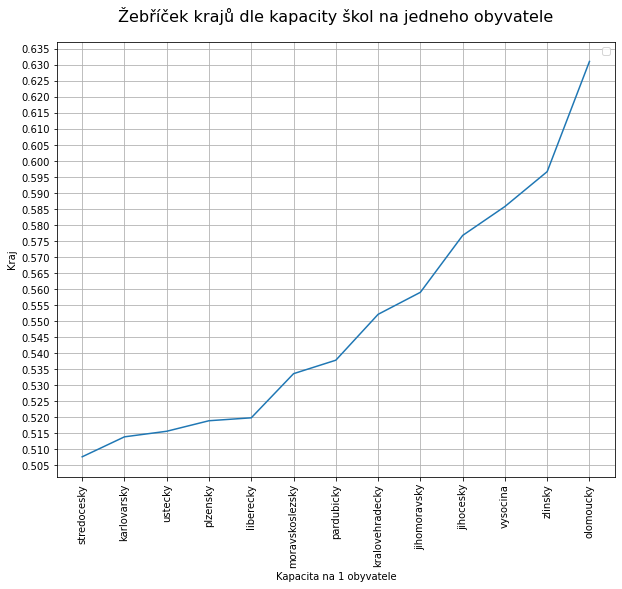

In [81]:
# load stored data from csv file to python pandas dataframe
df = pd.read_csv ('./output/csv/population_capacity_regions.csv')

region_names_dict = dict()
region_names_dict['stredocesky'] ='Středočeský' 
region_names_dict['jihomoravsky'] = 'Jihomoravský'
region_names_dict['moravskoslezsky'] = 'Moravskoslezský'
region_names_dict['ustecky'] = 'Ústecký'
region_names_dict['olomoucky'] = 'Olomoucký'
region_names_dict['jihocesky'] = 'Jihočeský'
region_names_dict['zlinsky'] = 'Zlínský'
region_names_dict['plzensky'] = 'Plzeňský'
region_names_dict['karlovarsky'] = 'Karlovarský'
region_names_dict['kralovehradecky'] = 'Královéhradecký'
region_names_dict['vysocina'] = 'Vysočina'
region_names_dict['liberecky'] = 'Liberecký'
region_names_dict['pardubicky'] = 'Pardubický'


# get data to plot
sorted_regions_labels = []
for ordered_kraj in df["Kraj"]:
    sorted_regions_labels.append(region_names_dict[ordered_kraj])
population = list(df["Populace"])
capacity = list(df["Kapacita"])

# set width of bars
width = 0.4
# Set position of bar on X axis
r = np.arange(len(sorted_regions_labels))
capacity_bars = [x + width/2 for x in r]
population_bars = [x - width/2 for x in r]
 
# Make the plot init
fig = plt.figure(figsize=(20, 20), dpi=80)
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax.ticklabel_format(style='plain')

# add data to bars
plt.bar(capacity_bars, capacity, color='#57c5db', width=width, edgecolor='white', label='Kapacita')
plt.bar(population_bars, population, color='#ff4d4d', width=width, edgecolor='white', label='Populace')
 
# plot text
plt.xlabel('Kraj', fontweight='bold')
plt.xticks([r for r in range(len(sorted_regions_labels))], sorted_regions_labels, rotation = 90)
plt.ylabel('Počet', fontweight='bold')
plt.legend(prop={'size': 10})

# plot and save
plt.savefig("output/svg/bar_region_school_cap.svg", format="svg", bbox_inches='tight')


################### SECOND (third) GRAF ###################
df = df.sort_values(["Populace"], ascending=False).reset_index(drop=True)
sorted_regions_labels = []
for ordered_kraj in df["Kraj"]:
    sorted_regions_labels.append(region_names_dict[ordered_kraj])

# get data
population = list(df["Populace"])
capacity = list(df["Kapacita"])
data = [capacity[i]/pop for i, pop in enumerate(population)]
data_y, data_x = zip(*sorted(zip(data, df['Kraj'])))

# fig init
fig = plt.figure(figsize=(20, 20), dpi=80)
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

# fig text
plt.title('Žebříček krajů dle kapacity škol na jedneho obyvatele', fontsize=16, pad=20)
plt.legend(prop={'size': 10})
plt.xlabel("Kapacita na 1 obyvatele")
plt.ylabel("Kraj")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,1,0.005))
plt.grid()

# add data to line chart
plt.plot(data_x,data_y)

# plot and save
plt.savefig("output/svg/bar_hor_region_population.svg", format="svg", bbox_inches='tight')

# Vlastný dotaz - 1

Vybraný kraj (juhomoravský) - kapacita základních škol a počet detí vo veku 5 - 15 rokov 

- [Kapacita základních škol a počet detí vo veku 5 - 15 rokov](./output/csv/population_5-15_capacity_jihomoravsky.csv)

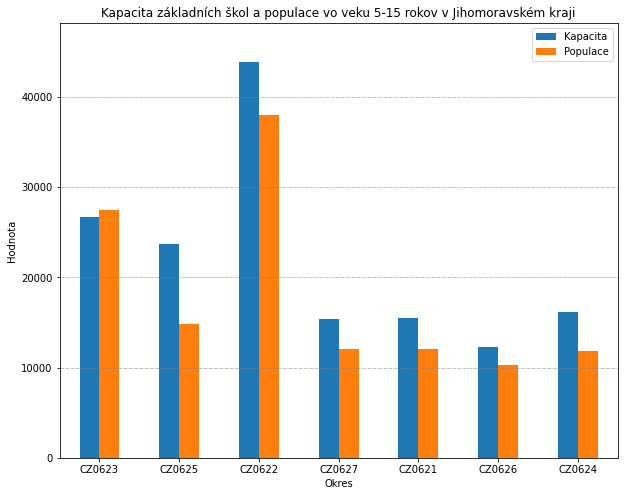

In [14]:
# load stored data from csv file to python pandas dataframe
df = pd.read_csv ('./output/csv/population_5-15_capacity_jihomoravsky.csv')
df = df.set_index("Okres")

ax = df.plot(kind='bar', rot=0, xlabel='Okres', ylabel='Hodnota', title='Kapacita základních škol a populace vo veku 5-15 rokov v Jihomoravském kraji', figsize=(10, 8))

ax.margins(y=0.1)
plt.grid(axis = 'y', color = 'grey', linestyle = '-.', linewidth = 0.5)

plt.legend(prop={'size': 10})
plt.savefig("output/svg/bar_region_school_cap_population.svg", format="svg", bbox_inches='tight')

# Vlastný dotaz - 2

Vybraný kraj (jihomoravský) - počet mužů a žen

- [počet mužů a žen v Jihomoravském kraji](./output/csv/population_gender.csv)

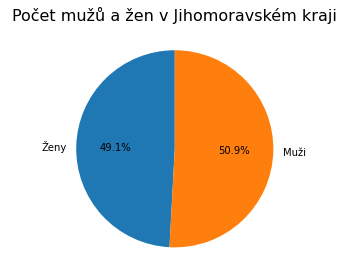

In [92]:
# load stored data from csv file to python pandas dataframe
df = pd.read_csv ('./output/csv/population_gender.csv')

labels = 'Ženy', 'Muži'
sizes = df['počet']

fig, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal') 

plt.title('Počet mužů a žen v Jihomoravském kraji', fontsize=16, pad=20)
fig.patch.set_facecolor('white')


plt.savefig("output/svg/population_gender.svg", format="svg", bbox_inches='tight')